In [32]:
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [33]:
NY_Crime = pd.read_csv('NYM.csv')
NY_Crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan


In [34]:
NY_Crime.columns = NY_Crime.iloc[3]
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan


In [35]:
NY_Crime = NY_Crime.drop(NY_Crime.index[:4])

In [36]:
NY_Crime = NY_Crime.reset_index(drop=True)
NY_Crime.drop(labels=[348, 349, 350], axis=0, inplace=True)

In [37]:
NY_Crime.rename(columns = {"Murder and\nnonnegligent\nmanslaughter" : 'Murder'}, inplace=True)
NY_Crime.rename(columns = {"Property\ncrime" : 'Property_Crime'}, inplace=True)
NY_Crime.rename(columns = {"Violent\ncrime" : 'Violent_Crime'}, inplace=True)
NY_Crime.head()

3,City,Population,Violent_Crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,nan
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,nan
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,nan
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,nan
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,nan


In [38]:
NY_Crime['Murder'] = NY_Crime['Murder'].str.replace(",", "")
NY_Crime['Robbery'] = NY_Crime['Robbery'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].str.replace(",", "")
NY_Crime['Violent_Crime'] = NY_Crime['Violent_Crime'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].astype(int)
NY_Crime['Murder'] = NY_Crime['Murder'].astype(int)
NY_Crime['Robbery'] = NY_Crime['Robbery'].astype(int)
NY_Crime['Population'] = NY_Crime['Population'].str.replace(",", "")
NY_Crime['Population'] = NY_Crime.Population.astype(int)
NY_Crime['Violent_Crime'] = NY_Crime['Violent_Crime'].astype(int)

In [39]:
NY_Crime['Murder2'] = NY_Crime['Murder'].apply(lambda x: 1 if x > 0 else 0)
NY_Crime['Robbery2'] = NY_Crime['Robbery'].apply(lambda x: 1 if x > 0 else 0)
NY_Crime.head()

3,City,Population,Violent_Crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Murder2,Robbery2
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,nan,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,nan,0,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,nan,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,"3,243",142,NaN,nan,1,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,nan,0,1


In [40]:
NY_Crime['Population'] = NY_Crime['Population'].apply(lambda x: x if x < 10000 else 0)
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].apply(lambda x: x if x < 1000 else 0)
NY_Crime['Violent_Crime'] = NY_Crime['Violent_Crime'].apply(lambda x: x if x < 250 else 0)

In [41]:
NY_Crime = NY_Crime[['Property_Crime', 'Violent_Crime', 'Population', 'Robbery2']]
NY_Crime.head()

3,Property_Crime,Violent_Crime,Population,Robbery2
0,12,0,1861,0
1,24,3,2577,0
2,16,3,2846,0
3,0,0,0,1
4,223,23,6388,1


In [42]:
NY_Crimes = NY_Crime

In [43]:
NY_Crimes = pd.DataFrame()

In [44]:
NY_Crimes['Population'] = NY_Crime['Population']
NY_Crimes['Robbery2'] = NY_Crime['Robbery2']
NY_Crimes['Property_Crime'] = NY_Crime['Property_Crime']
NY_Crimes['Violent_Crime'] = NY_Crime['Violent_Crime']

In [45]:
NY_Crime['Population'].head()

0    1861
1    2577
2    2846
3       0
4    6388
Name: Population, dtype: int64

In [46]:
NY_Crimes['Population'] = NY_Crimes[NY_Crimes['Population'] >= 1]

In [47]:
NY_Crimes.dropna(inplace=True)

In [48]:
NY_Crimes.head()

,Population,Robbery2,Property_Crime,Violent_Crime
0,1861.000,0,12,0
1,2577.000,0,24,3
2,2846.000,0,16,3
4,6388.000,1,223,23
5,4089.000,1,46,5


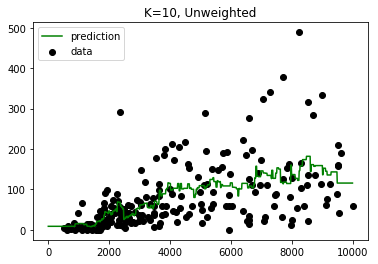

In [49]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(NY_Crimes.Population)
Y = NY_Crimes.Property_Crime
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 10000, 10)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X.values, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

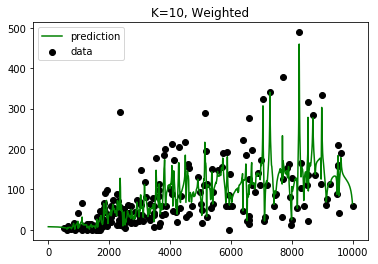

In [50]:

# Run the same model, this time with weights.# Run the 
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(NY_Crimes.Population)
Y = NY_Crimes.Property_Crime
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 10000, 10)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X.values, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.07 (+/- 0.24)
Weighted Accuracy: -0.04 (+/- 0.27)


In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [53]:
NY_Crimes = NY_Crimes.loc[:,['Population', 'Property_Crime', 'Violent_Crime']]
NY_Crimes.head()

,Population,Property_Crime,Violent_Crime
0,1861.000,12,0
1,2577.000,24,3
2,2846.000,16,3
4,6388.000,223,23
5,4089.000,46,5


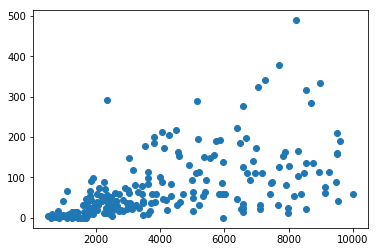

In [68]:
y = NY_Crimes.Property_Crime
x = NY_Crimes.loc[:,["Population"]]
plt.scatter(x.values,y)

R-squared regression: 0.28629430441830983
Coefficients: 
 [0.01693046]
Intercept: 
 5.68117501064539


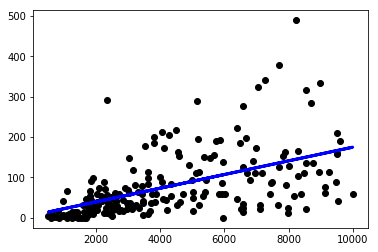

In [69]:

# Instantiate our model.# Instant 
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

Y_pred = regr.predict(x)
print('R-squared regression:', regr.score(x, y))

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x.values, y, color='black')
plt.plot(x.values, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [70]:
## We can try to convert our data to z-scores

In [71]:
from sklearn.cross_decomposition import PLSRegression
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(x, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(x)
print('R-squared PLSR:', pls1.score(x, y))

# Print results
print('\nCoefficients: \n', pls1.coef_)

## Coefficients chances, but R-Squared is still the same.

R-squared PLSR: 0.28629430441830983

Coefficients: 
 [[43.32529361]]


KNN Regression (unweighted) and OLS Regression do have similarity, both heading toward the same destination. But at the
end, the KNN Regression is heading downward. But I believe if we have more(extend our) dataset to over 10000, then we probably
might not see that drop. 

The weighted KNN Regression is very messy, and both Weighted and unweighted have very low accuratecy rate, also, the OLS is not that great as a predictor as well. So, both KNN and OLS are not so trustworthy.
                                                
If I were to pick one, I probably would go for the unweighted KNN Regression. KNN is more precise/accurate than OLS, and we need to be precise to have a better outcome of what we want.

I might pick OLS if the dataset is very scattered, and KNN will give a plot that look like the weighted KNN, then I will surely go for OLS Regression as we can tell where things are heading much clearer than the KNN.

Both models are good, but KNN is better in a sense that it uses all the dataset to it advantage and draw the line more accurate base off of the information that it have. Whereas, OLS is drawing a line that "Best fit all", and that can be a hit or miss situation.                                                    
                                            

## We will do a sample evaluation and cross validation to see if our dataset is overfitting or not. 

In [88]:
data = x
target = y
print(data.head())
print(target.head())

   Population
0    1861.000
1    2577.000
2    2846.000
4    6388.000
5    4089.000
0     12
1     24
2     16
4    223
5     46
Name: Property_Crime, dtype: int64


In [89]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(X_train, y_train).score(data, target)))

With 20% Holdout: 0.047619047619047616
Testing on Sample: 0.02857142857142857


In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=4)

C:\Users\cvo.MODIFIEDPOLYMER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


array([0.016     , 0.04081633, 0.04      , 0.09090909])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(bnb1.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb1.fit(X_train, y_train).score(data, target)))

With 30% Holdout: 0.031746031746031744
Testing on Sample: 0.02857142857142857


In [96]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb1.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb1.fit(X_train, y_train).score(data, target)))

With 50% Holdout: 0.0
Testing on Sample: 0.014285714285714285


## Looking at the Cross Validation, we can see that our dataset is overfitting quite a bit. The more data we holdout, the less reliable our dataset become. Once we passed 50%, our dataset have 0 percentage of reliability.